<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Machine_Learning/blob/main/LogisticAndRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
dataset = pd.read_csv("/content/weatherAUS.csv")
dataset.dropna(subset=['RainToday','RainTomorrow'], inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41583 entries, 0 to 43369
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           41583 non-null  object 
 1   Location       41583 non-null  object 
 2   MinTemp        41287 non-null  float64
 3   MaxTemp        41403 non-null  float64
 4   Rainfall       41583 non-null  float64
 5   Evaporation    21871 non-null  float64
 6   Sunshine       16882 non-null  float64
 7   WindGustDir    36920 non-null  object 
 8   WindGustSpeed  36924 non-null  float64
 9   WindDir9am     37287 non-null  object 
 10  WindDir3pm     39679 non-null  object 
 11  WindSpeed9am   41057 non-null  float64
 12  WindSpeed3pm   40321 non-null  float64
 13  Humidity9am    41169 non-null  float64
 14  Humidity3pm    40433 non-null  float64
 15  Pressure9am    35276 non-null  float64
 16  Pressure3pm    35247 non-null  float64
 17  Cloud9am       25533 non-null  float64
 18  Cloud3pm   

In [9]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
px.histogram(dataset, x="Location", color="RainToday", color_discrete_sequence=['green', 'grey'])

In [12]:
px.histogram(dataset, x="Temp3pm", color="RainToday", color_discrete_sequence=['green', 'grey'])

In [13]:
px.scatter(dataset.sample(2000), x="MinTemp", y="MaxTemp", color="RainToday")

<Axes: xlabel='Date', ylabel='count'>

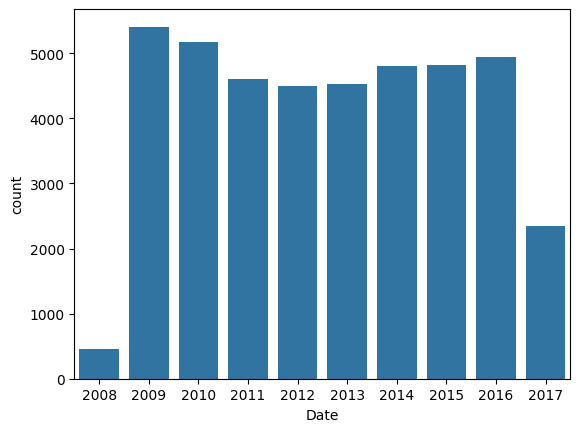

In [14]:
sns.countplot(x=pd.to_datetime(dataset['Date']).dt.year)

In [15]:
dataset = dataset[pd.to_datetime(dataset['Date']).dt.year != 2007]
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<Axes: xlabel='Date', ylabel='count'>

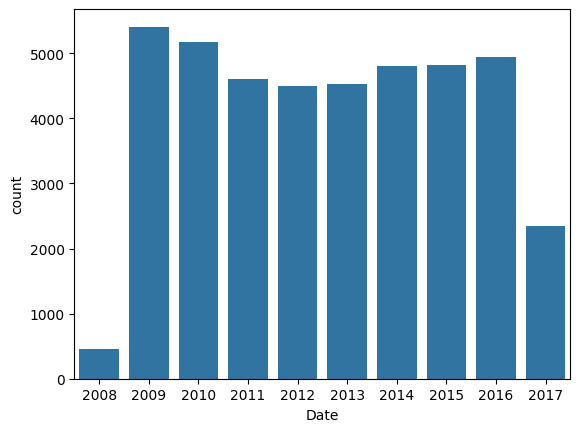

In [16]:
sns.countplot(x=pd.to_datetime(dataset['Date']).dt.year)

In [17]:
input_cols = list(dataset.columns[1:-1])
target_col = 'RainTomorrow'

In [18]:
numeric_cols = dataset[input_cols].select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = dataset[input_cols].select_dtypes(include=['object']).columns.tolist()

In [19]:
numeric_cols, categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

#**Impute Missing Values**

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [21]:
dataset[numeric_cols].isna().sum()

MinTemp            296
MaxTemp            180
Rainfall             0
Evaporation      19712
Sunshine         24701
WindGustSpeed     4659
WindSpeed9am       526
WindSpeed3pm      1262
Humidity9am        414
Humidity3pm       1150
Pressure9am       6307
Pressure3pm       6336
Cloud9am         16050
Cloud3pm         16385
Temp9am            194
Temp3pm            931
dtype: int64

In [22]:
dataset[categorical_cols].isna().sum()

Location          0
WindGustDir    4663
WindDir9am     4296
WindDir3pm     1904
RainToday         0
dtype: int64

In [23]:
#Fit Imputer
imputer.fit(dataset[numeric_cols])

SimpleImputer()

In [24]:
imputer.statistics_

array([  13.11129411,   23.82692317,    2.67381382,    5.61370308,
          7.58500178,   38.58271043,   12.95333317,   17.73455519,
         69.87704341,   52.05661217, 1018.28119118, 1015.72932709,
          4.28805859,    4.38522899,   17.6590785 ,   22.36305717])

In [25]:
dataset[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43365,21.5,29.7,0.0,NaN,NaN,39.0,15.0,11.0,57.0,55.0,1008.3,1007.4,7.0,1.0,25.1,28.3
43366,20.5,25.4,1.6,NaN,NaN,44.0,7.0,26.0,88.0,84.0,1010.7,1007.5,8.0,8.0,21.3,23.3
43367,21.3,33.0,0.2,NaN,NaN,56.0,4.0,15.0,68.0,31.0,1001.9,1003.6,NaN,NaN,25.2,31.0
43368,17.4,22.3,0.0,NaN,NaN,41.0,17.0,9.0,71.0,67.0,1017.8,1015.4,7.0,8.0,18.7,20.2


In [26]:
dataset.loc[:, numeric_cols] = imputer.transform(dataset[numeric_cols])

In [27]:
dataset[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.613703,7.585002,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.385229,16.9,21.8
1,7.4,25.1,0.0,5.613703,7.585002,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.288059,4.385229,17.2,24.3
2,12.9,25.7,0.0,5.613703,7.585002,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.288059,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.613703,7.585002,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.288059,4.385229,18.1,26.5
4,17.5,32.3,1.0,5.613703,7.585002,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43365,21.5,29.7,0.0,5.613703,7.585002,39.0,15.0,11.0,57.0,55.0,1008.3,1007.4,7.000000,1.000000,25.1,28.3
43366,20.5,25.4,1.6,5.613703,7.585002,44.0,7.0,26.0,88.0,84.0,1010.7,1007.5,8.000000,8.000000,21.3,23.3
43367,21.3,33.0,0.2,5.613703,7.585002,56.0,4.0,15.0,68.0,31.0,1001.9,1003.6,4.288059,4.385229,25.2,31.0
43368,17.4,22.3,0.0,5.613703,7.585002,41.0,17.0,9.0,71.0,67.0,1017.8,1015.4,7.000000,8.000000,18.7,20.2


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
scaler.fit(dataset[numeric_cols])

MinMaxScaler()

In [30]:
dataset.loc[:,numeric_cols] = scaler.transform(dataset[numeric_cols])

In [31]:
dataset[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000,41583.000000
mean,0.519168,0.427486,0.007207,0.038715,0.537943,0.246740,0.099641,0.213669,0.689454,0.515723,0.636047,0.633264,0.476451,0.548154,0.468411,0.402041
std,0.167907,0.146713,0.025264,0.022823,0.172965,0.101703,0.069122,0.110962,0.179393,0.204130,0.103753,0.105334,0.254022,0.262660,0.143100,0.142369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.397101,0.319512,0.000000,0.030345,0.537943,0.179688,0.046154,0.132530,0.567010,0.363636,0.575758,0.572414,0.333333,0.375000,0.366048,0.299754
50%,0.533333,0.414634,0.000000,0.038715,0.537943,0.246740,0.099641,0.204819,0.690722,0.515723,0.636047,0.633264,0.476451,0.548154,0.480106,0.390663
75%,0.653623,0.517073,0.002156,0.038715,0.537943,0.289062,0.146154,0.289157,0.824742,0.656566,0.696970,0.696552,0.666667,0.750000,0.572944,0.486486
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(dataset[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [33]:
encoder.categories_

[array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
        'Wollongong'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [34]:
encoded_cols = encoder.transform(dataset[categorical_cols]).toarray()
encoded_cols = encoded_cols.astype(float)


In [35]:
import numpy as np
numeric_cols_array = dataset[numeric_cols].values
all_features = np.concatenate((numeric_cols_array, encoded_cols), axis=1)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')

In [37]:
classifier.fit(all_features, dataset[target_col])

LogisticRegression(solver='liblinear')

In [38]:
classifier.fit(np.concatenate((dataset[numeric_cols].values, encoded_cols), axis=1), dataset[target_col])

LogisticRegression(solver='liblinear')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_features, dataset[target_col], test_size=0.2, random_state=1)

predictions = classifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8446555248286641

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, normalize='true')

array([[0.94791505, 0.05208495],
       [0.51232583, 0.48767417]])

#**RandomForest and DecisionTree**

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
model = DecisionTreeClassifier(random_state=42)
model.fit(all_features, dataset[target_col])

DecisionTreeClassifier(random_state=42)

In [48]:
predictions = model.predict(X_test)

In [49]:
accuracy_score(y_test, predictions)

0.9997595286762053

In [50]:
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)
model_rf.fit(all_features, dataset[target_col])

RandomForestClassifier(n_jobs=-1, random_state=42)

In [51]:
predictions = model_rf.predict(X_test)

In [52]:
accuracy_score(y_test, predictions)

0.9997595286762053

In [54]:
model_rf.score(X_test, y_test)

0.9997595286762053